In [4]:
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import unumpy
from uncertainties import *
from scipy.stats import chisquare

In [6]:
32/2/np.pi

5.092958178940651

## Single Loop

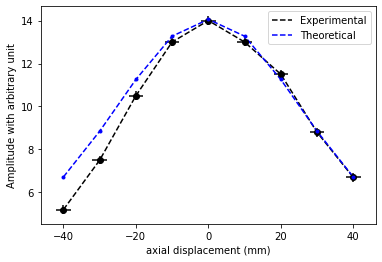

In [20]:
d1 = [0,10,20,30,40,50,60,70,80]
V1 = np.array([5.20,7.50,10.50,13.00,14.00,13.00,11.50,8.80,6.70])
d11 = np.array(d1)-[40]*len(d1)
err = np.array([0.2]*len(d1))


V1theoretical = np.array([0.120,0.158,0.201,0.237,0.251,0.237,0.201,0.158,0.120])*56
uncertainty = np.array([0.001]*len(d1))*56

plt.plot(d11,V1,'--k')
plt.plot(d11,V1theoretical,'--b')
plt.errorbar(d11,V1,xerr=2,yerr=0.2,fmt='ok')  #2 due to parallex, 0.2 due to fluctuation
plt.errorbar(d11,V1theoretical,yerr=uncertainty,fmt='.b')
plt.legend(['Experimental','Theoretical'])
plt.xlabel('axial displacement (mm)')
plt.ylabel('Amplitude with arbitrary unit')
plt.savefig('single loop.pdf')


### Need to find out dimension of the single-loop antenna

In [19]:
def chisq(obs, exp, error):
    return np.sum((obs - exp) ** 2 / (error ** 2))

print(chisq(V1, V1theoretical, err+uncertainty))
print(chisquare(V1,V1theoretical))

74.95703124999999
Power_divergenceResult(statistic=0.616935722164019, pvalue=0.9997048678546059)


## Double Saddle Antenna

### Axial through the centre

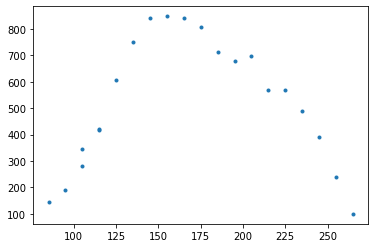

In [17]:
d2 = [85,95,105,105,115,115,125,135,145,155,165,175,185,195,205,215,225,235,245,255,265,]
V2 = [144,192,344,280,416,420,608,752,840,848,840,808,712,680,696,568,568,488,392,240,100]
plt.plot(d2,V2,'.')

### Radial

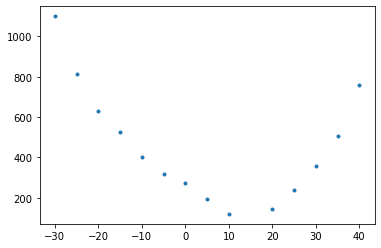

In [18]:
dr = [40,35,30,25,20,15,10,5,0,-5,-10,-15,-20,-25,-30]
Vr = [760,504,360,240,144,np.nan,120,192,272,320,400,528,632,816,1100]
plt.plot(dr,Vr,'.')

### Axial along edge (-25mm)

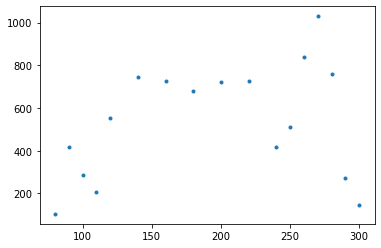

In [19]:
d3 = [300,290,280,270,260,250,240,220,200,180,160,140,120,110,100,90,80]
V3 = [144,272,760,1030,840,512,416,728,720,680,728,744,552,208,288,416,104]
plt.plot(d3,V3,'.')

### Radial B_r (250mm)

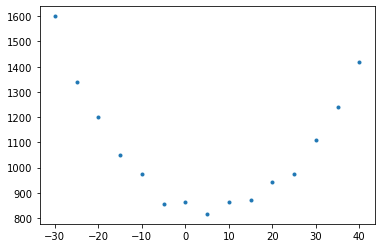

In [27]:
drr=[-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30,35,40]
Vrr=[1600,1340,1200,1050,976,856,864,816,864,872,944,976,1110,1240,1420]
plt.plot(drr,Vrr,'.')

### Plotting

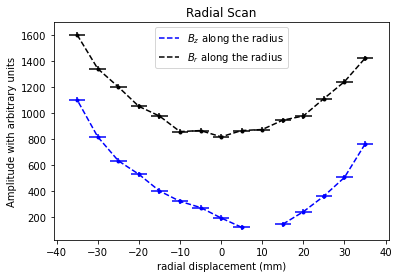

In [328]:
plt.plot(np.array(dr)-[5]*len(dr),Vr,'--b')
plt.plot(np.array(drr)-[5]*len(drr),Vrr,'--k')
plt.errorbar(np.array(dr)-[5]*len(dr),Vr,xerr=2,yerr=20,fmt='.b')  #2 due to rotation of probe
plt.errorbar(np.array(drr)-[5]*len(dr),Vrr,xerr=2,yerr=20,fmt='.k')  #30 due to fluctuation
plt.legend(['$B_z$ along the radius','$B_r$ along the radius'])
plt.title('Radial Scan')
plt.xlabel('radial displacement (mm)')
plt.ylabel('Amplitude with arbitrary units')
plt.savefig('B along the radius.pdf')

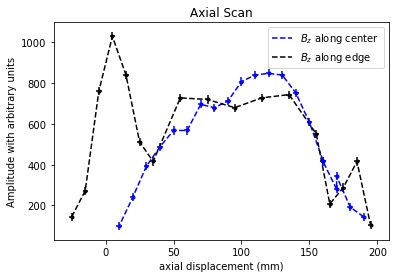

In [308]:
plt.plot(-np.array(d2)+[275]*len(d2),V2,'--b')
plt.plot(-np.array(d3)+[275]*len(d3),V3,'--k')
plt.errorbar(-np.array(d2)+[275]*len(d2),V2,xerr=2,yerr=20,fmt='.b')
plt.errorbar(-np.array(d3)+[275]*len(d3),V3,xerr=2,yerr=20,fmt='.k')
plt.legend(['$B_z$ along center','$B_z$ along edge'])
plt.title('Axial Scan')
plt.xlabel('axial displacement (mm)')
plt.ylabel('Amplitude with arbitrary units')
plt.savefig('B along axial.pdf')

## Plasma

### First runs (20 sccm, 20A, 300 W)

#### Radial, z coil

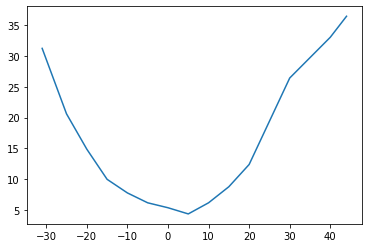

In [40]:
dp = [44,40,30,20,15,10,5,0,-5,-10,-15,-20,-25,-31]
Vp = [36.4,33,26.40,12.40,8.8,6.2,4.4,5.4,6.2,7.8,10.0,14.88,20.6,31.2]
plt.plot(dp,Vp,'-')

### Second runs (60 sccm, 4A, 600W, 10% duty cycle)

In [54]:
#Radial, r coil
dp1 = np.array([[43,40,35,30,25,20,15,10,5,0,-5,-10,-15,-20,-25],[5]*15])  ##has uncertainty of 5mm due to orientation of the probe
Vp1 = np.array([[740,800,820,870,860,920,910,880,860,860,850,820,790,770,780],[50]*15])

#Radial, z coil
dp2 = np.array([[-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30,35,40],[5]*15])
Vp2 = np.array([[3.40,3.70,3.70,3.76,3.80,3.80,3.70,3.80,3.20,3.30,1.70,1.70,1.70,1.76,1.76],[0.10]*15])
dp22 = np.array([[-30,-15,-5,5,15,20,30,40],[5]*8])  ## Re-ran the measurement because of jumps
Vp22 = np.array([[2.80,3.12,3.08,3.08,3.12,3.20,3.40,1.90],[0.10]*8])

#Axial, z coil, @40cm (at edge)
dp3 = np.array([[319,289,259,229,209,179,149,122,99,69,49],[5]*11])
Vp3 = np.array([[1.84,1.96,1.72,2.30,3.12,2.70,2.28,2.00,1.96,1.76,1.72],[0.12,0.12,0.12,0.20,0.12,0.15,0.25,0.12,0.04,0.04,0.04]])
            #0.12 came from average

#Axial, z coil, @5cm (near center)
dp4 = np.array([[309,279,259,229,204,174,139,99,49],[5]*9])
Vp4 = np.array([[1.68,1.76,1.92,1.48,1.40,1.52,2.00,1.48,1.32],[0.04,0.04,0.08,0.10,0.10,0.08,0.06,0.06,0.04]])

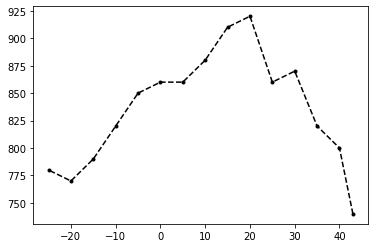

In [125]:
plt.plot(dp1[0],Vp1[0],'--k')
plt.plot(dp1[0],Vp1[0],'.k')

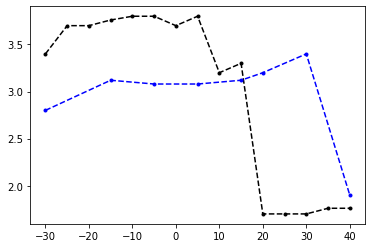

In [126]:
plt.plot(dp2[0],Vp2[0],'--k')
plt.plot(dp2[0],Vp2[0],'.k')
plt.plot(dp22[0],Vp22[0],'--b')
plt.plot(dp22[0],Vp22[0],'.b')

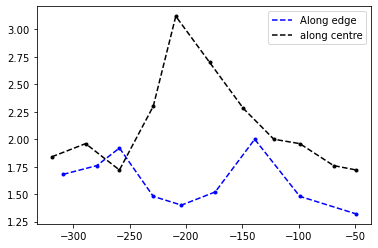

In [92]:
plt.plot(-dp4[0],Vp4[0],'--b')
plt.plot(-dp3[0],Vp3[0],'--k')
plt.plot(-dp4[0],Vp4[0],'.b')
plt.plot(-dp3[0],Vp3[0],'.k')
plt.legend(['Along edge','along centre'])

# Comparisons

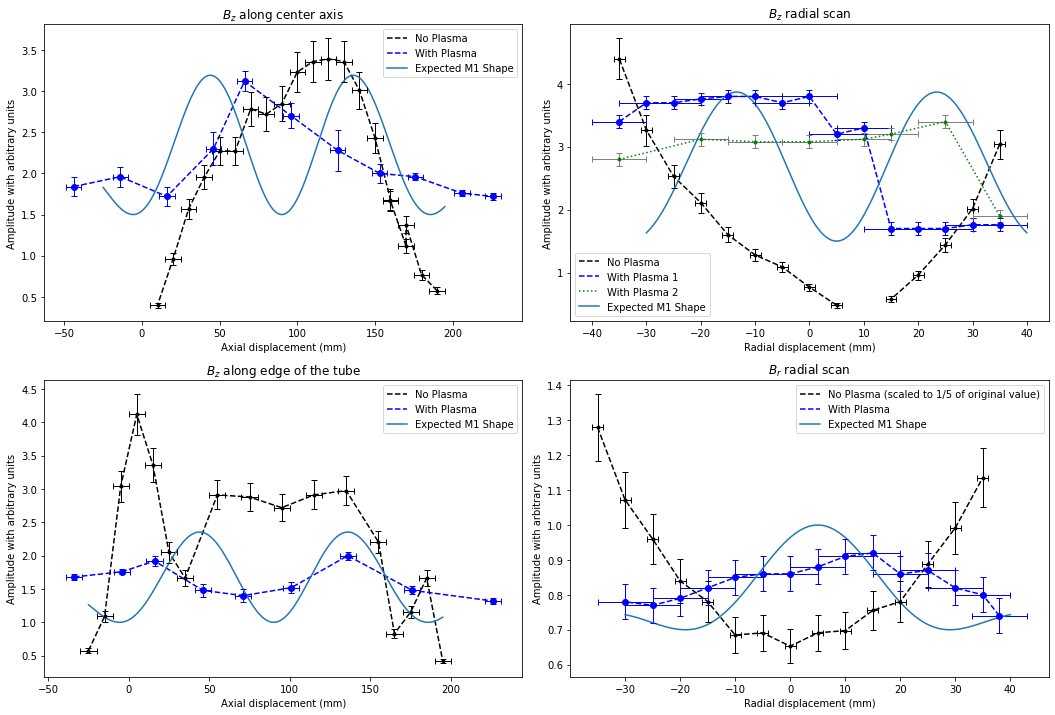

In [326]:
for ax in fig.get_axes():
    ax.label_outer()
    
fig, (
      (ax1, ax2),
      (ax3, ax4)) = plt.subplots(2, 2,gridspec_kw={'hspace': 0.2, 'wspace': 0.1},figsize=(18, 12))

x = np.linspace(-180, 180, 500)



ax1.plot(-np.array(d2)+[275]*len(d2),np.array(V2)*0.004,'--k')
ax1.plot(-dp3[0]+[275]*len(dp3[0]),Vp3[0],'--b')

x1=np.linspace(-np.max(d3)+275,-np.min(d3)+275,500)
ax1.plot(x1,5*sp.jv(1,0.04*(x1-[90]*500))**2+[1.5]*500)

ax1.errorbar(-np.array(d2)+[275]*len(d2),np.array(V2)*0.004,xerr=[5]*len(d2),yerr=np.array(V2)*0.004*15/200,
             fmt='.k',elinewidth=1,capsize=3)
ax1.errorbar(-dp3[0]+[275]*len(dp3[0]),Vp3[0],xerr=dp3[1],yerr=Vp3[1],
            fmt='ob',elinewidth=1,capsize=3)
ax1.legend(['No Plasma','With Plasma','Expected M1 Shape'])
ax1.set(title='$B_z$ along center axis',xlabel='Axial displacement (mm)',ylabel='Amplitude with arbitrary units')

ax3.plot(-np.array(d3)+[275]*len(d3),np.array(V3)*0.004,'--k')
ax3.plot(-dp4[0]+[275]*len(dp4[0]),Vp4[0],'--b')
ax3.plot(x1,4*sp.jv(1,0.04*(x1-[90]*500))**2+[1]*500)
ax3.errorbar(-np.array(d3)+[275]*len(d3),np.array(V3)*0.004,xerr=[5]*len(d3),yerr=np.array(V3)*0.004*15/200,
             fmt='.k',elinewidth=1,capsize=3)
ax3.errorbar(-dp4[0]+[275]*len(dp4[0]),Vp4[0],xerr=dp4[1],yerr=Vp4[1],
            fmt='ob',elinewidth=1,capsize=3)
ax3.legend(['No Plasma','With Plasma','Expected M1 Shape'])
ax3.set(title='$B_z$ along edge of the tube',xlabel='Axial displacement (mm)',ylabel='Amplitude with arbitrary units')




ax2.plot(np.array(dr)-[5]*len(dr),np.array(Vr)*0.004,'--k')
ax2.plot(dp2[0]-[5]*len(dp2[0]),Vp2[0],'--b')
ax2.plot(dp22[0]-[5]*len(dp22[0]),Vp22[0],':g')
x2=np.linspace(-30,40,500)
ax2.plot(x2,7*sp.jv(1,0.1*(x2-[5]*500))**2+[1.5]*500)
ax2.errorbar(np.array(dr)-[5]*len(dr),np.array(Vr)*0.004,xerr=[1]*len(dr),yerr=np.array(Vr)*0.004*15/200, #15/200 is for power, 0.004 scaling
             fmt='.k', elinewidth=1, capsize=3)
ax2.errorbar(dp2[0]-[5]*len(dp2[0]),Vp2[0],xerr=dp2[1],yerr=Vp2[1],
             fmt='ob', elinewidth=1, capsize=3)
ax2.errorbar(dp22[0]-[5]*len(dp22[0]),Vp22[0],xerr=dp22[1],yerr=Vp22[1],
             fmt='.g', ecolor='#808080',elinewidth=1, capsize=3)
ax2.set(title='$B_z$ radial scan',xlabel='Radial displacement (mm)',ylabel='Amplitude with arbitrary units')

ax2.legend(['No Plasma','With Plasma 1','With Plasma 2','Expected M1 Shape'])


ax4.plot(np.array(drr)-[5]*len(drr),np.array(Vrr)*0.0008,'--k')
ax4.plot(dp1[0]-[5]*len(dp1[0]),Vp1[0]*0.001,'--b')
ax4.plot(x2,0.3*sp.jv(0,0.1*(x2-[5]*500))**2+[0.7]*500)
ax4.errorbar(np.array(drr)-[5]*len(drr),np.array(Vrr)*0.0008,xerr=[1]*len(drr),yerr=np.array(Vrr)*0.0008*15/200,
             fmt='.k',elinewidth=1, capsize=3)
ax4.errorbar(dp1[0]-[5]*len(dp1[0]),Vp1[0]*0.001,xerr=dp1[1],yerr=Vp1[1]*0.001,
            fmt='ob',elinewidth=1,capsize=3)
ax4.set(title='$B_r$ radial scan',xlabel='Radial displacement (mm)',ylabel='Amplitude with arbitrary units')
ax4.legend(['No Plasma (scaled to 1/5 of original value)','With Plasma','Expected M1 Shape'])

plt.savefig('Plasma.pdf')

In [ ]:
##label where the antenna starts and finishes.  275 & 85

In [1]:
import scipy.special as sp

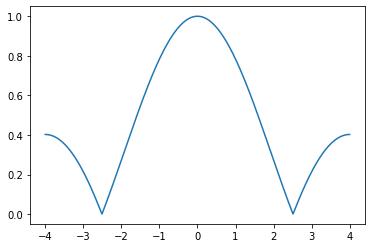

In [22]:
r0=4
x2=np.linspace(-r0,r0,500)
k=np.array([3.83/r0]*len(x2))
plt.plot(x2,np.abs(sp.jv(0,k*x2)))

-190.0